<a href="https://colab.research.google.com/github/Priyanka308/Priyanka-site/blob/main/precisionagriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING LIBRARIES

In [ ]:
 #Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#importing required libaries ofr model building
from sklearn.model_selection import train_test_split


# Importing required packages for Model evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pa.csv to pa.csv


#####READING CSV FILE

In [ ]:
path='/content/pa.csv'
df=pd.read_csv(path, engine='python',sep=',', quotechar='"', error_bad_lines=False)
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Date time (time zone: Asia/Kolkata),Temperature (°C),Humidity (%),Pressure (hPa),Leaf wetness (%),Soil temperature (°C),Soil moisture primary root zone (centibar),Soil moisture secondary root zone (centibar),Lux,Solar intensity (%)
0,"December 15, 2021 12:23 AM",15.63,87.85,960.42,35,21.38,16.82,11.22,0,0
1,"December 15, 2021 1:23 AM",15.10,90.58,960.22,43,21,16.53,11.03,0,0
2,"December 15, 2021 2:23 AM",14.64,90.44,959.63,58,20.62,16.58,10.82,0,0
3,"December 15, 2021 3:23 AM",14.08,91.74,959.36,62,20.31,16.52,10.94,0,0
4,"December 15, 2021 4:24 AM",13.75,92.45,959.17,67,19.94,16.47,10.86,0,0


In [ ]:
# Let's check the dimensions of the dataframe
df.shape

(2560, 10)

In [ ]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date time (time zone: Asia/Kolkata)           2560 non-null   object 
 1   Temperature (°C)                              2560 non-null   float64
 2   Humidity (%)                                  2560 non-null   float64
 3   Pressure (hPa)                                2560 non-null   float64
 4   Leaf wetness (%)                              2560 non-null   int64  
 5   Soil temperature (°C)                         2560 non-null   object 
 6   Soil moisture primary root zone (centibar)    2560 non-null   float64
 7   Soil moisture secondary root zone (centibar)  2560 non-null   float64
 8   Lux                                           2560 non-null   int64  
 9   Solar intensity (%)                           2560 non-null   i

#####WE'RE GOING TO PREDICT PLANT HEALTH HERE. TEMPERATURE, HUMIDITY, MOISTURE, AND LEAF WETNESS ARE THE FACTORS THAT WILL AFFECT IT.

In [ ]:
df.drop(df.iloc[:, 9:], inplace = True, axis = 1)
  
df.head()

,Date time (time zone: Asia/Kolkata),Temperature (°C),Humidity (%),Pressure (hPa),Leaf wetness (%),Soil temperature (°C),Soil moisture primary root zone (centibar),Soil moisture secondary root zone (centibar),Lux
0,"December 15, 2021 12:23 AM",15.63,87.85,960.42,35,21.38,16.82,11.22,0
1,"December 15, 2021 1:23 AM",15.10,90.58,960.22,43,21,16.53,11.03,0
2,"December 15, 2021 2:23 AM",14.64,90.44,959.63,58,20.62,16.58,10.82,0
3,"December 15, 2021 3:23 AM",14.08,91.74,959.36,62,20.31,16.52,10.94,0
4,"December 15, 2021 4:24 AM",13.75,92.45,959.17,67,19.94,16.47,10.86,0


In [ ]:
df.drop(df.iloc[:, 3:4], inplace = True, axis = 1)
  
df.head()

,Date time (time zone: Asia/Kolkata),Temperature (°C),Humidity (%),Leaf wetness (%),Soil temperature (°C),Soil moisture primary root zone (centibar),Soil moisture secondary root zone (centibar),Lux
0,"December 15, 2021 12:23 AM",15.63,87.85,35,21.38,16.82,11.22,0
1,"December 15, 2021 1:23 AM",15.10,90.58,43,21,16.53,11.03,0
2,"December 15, 2021 2:23 AM",14.64,90.44,58,20.62,16.58,10.82,0
3,"December 15, 2021 3:23 AM",14.08,91.74,62,20.31,16.52,10.94,0
4,"December 15, 2021 4:24 AM",13.75,92.45,67,19.94,16.47,10.86,0


In [ ]:
df.drop(df.iloc[:, 4:5], inplace = True, axis = 1)
  
df.head()

,Date time (time zone: Asia/Kolkata),Temperature (°C),Humidity (%),Leaf wetness (%),Soil moisture primary root zone (centibar),Soil moisture secondary root zone (centibar),Lux
0,"December 15, 2021 12:23 AM",15.63,87.85,35,16.82,11.22,0
1,"December 15, 2021 1:23 AM",15.10,90.58,43,16.53,11.03,0
2,"December 15, 2021 2:23 AM",14.64,90.44,58,16.58,10.82,0
3,"December 15, 2021 3:23 AM",14.08,91.74,62,16.52,10.94,0
4,"December 15, 2021 4:24 AM",13.75,92.45,67,16.47,10.86,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date time (time zone: Asia/Kolkata)           2560 non-null   object 
 1   Temperature (°C)                              2560 non-null   float64
 2   Humidity (%)                                  2560 non-null   float64
 3   Leaf wetness (%)                              2560 non-null   int64  
 4   Soil moisture primary root zone (centibar)    2560 non-null   float64
 5   Soil moisture secondary root zone (centibar)  2560 non-null   float64
 6   Lux                                           2560 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 140.1+ KB


In [ ]:
df.median(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Temperature (°C)                                21.35
Humidity (%)                                    63.35
Leaf wetness (%)                                 0.00
Soil moisture primary root zone (centibar)      22.52
Soil moisture secondary root zone (centibar)     1.18
Lux                                             16.00
dtype: float64

In [ ]:
df.mean(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Temperature (°C)                                  22.506531
Humidity (%)                                      62.573953
Leaf wetness (%)                                  10.168750
Soil moisture primary root zone (centibar)        26.270609
Soil moisture secondary root zone (centibar)       7.740691
Lux                                             4494.826172
dtype: float64

In [ ]:
df.isnull().sum()

Date time (time zone: Asia/Kolkata)             0
Temperature (°C)                                0
Humidity (%)                                    0
Leaf wetness (%)                                0
Soil moisture primary root zone (centibar)      0
Soil moisture secondary root zone (centibar)    0
Lux                                             0
dtype: int64

In [ ]:
df.describe()

,Temperature (°C),Humidity (%),Leaf wetness (%),Soil moisture primary root zone (centibar),Soil moisture secondary root zone (centibar),Lux
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,22.506531,62.573953,10.168750,26.270609,7.740691,4494.826172
std,7.858422,27.003899,19.609365,18.835065,9.798772,6521.174169
min,6.110000,8.000000,0.000000,1.000000,1.000000,0.000000
25%,16.287500,37.555000,0.000000,11.730000,1.090000,0.000000
50%,21.350000,63.350000,0.000000,22.520000,1.180000,16.000000
75%,28.650000,89.892500,8.000000,32.697500,11.220000,8683.750000
max,44.010000,100.000000,86.000000,94.160000,54.690000,54612.000000


#####RENAMING THE COLUMN NAMES

In [ ]:
df.rename(columns={'Date time (time zone: Asia/Kolkata)':'x'}, inplace=True)
df.rename(columns={'Temperature (°C)':'Temperature'}, inplace=True)
df.rename(columns={'Humidity (%)':'Humidity'}, inplace=True)
df.rename(columns={'Soil moisture primary root zone (centibar)':'Soilmoistureprimaryrootzone'}, inplace=True)
df.rename(columns={'Soil moisture secondary root zone (centibar)':'Soilmoisturesecondaryrootzone'}, inplace=True)
df.rename(columns={'Leaf wetness (%)':'Leafwetness'}, inplace=True)
df.head()

,x,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Soilmoisturesecondaryrootzone,Lux
0,"December 15, 2021 12:23 AM",15.63,87.85,35,16.82,11.22,0
1,"December 15, 2021 1:23 AM",15.10,90.58,43,16.53,11.03,0
2,"December 15, 2021 2:23 AM",14.64,90.44,58,16.58,10.82,0
3,"December 15, 2021 3:23 AM",14.08,91.74,62,16.52,10.94,0
4,"December 15, 2021 4:24 AM",13.75,92.45,67,16.47,10.86,0


###SEPERATING DAY,MONTH,YEAR AND TIME FROM DATE COLUMN

In [ ]:
df["x"]=pd.to_datetime(df["x"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   x                              2560 non-null   datetime64[ns]
 1   Temperature                    2560 non-null   float64       
 2   Humidity                       2560 non-null   float64       
 3   Leafwetness                    2560 non-null   int64         
 4   Soilmoistureprimaryrootzone    2560 non-null   float64       
 5   Soilmoisturesecondaryrootzone  2560 non-null   float64       
 6   Lux                            2560 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 140.1 KB


In [ ]:
df['Date']=df['x'].dt.date
df['Time']=df['x'].dt.time
df.head()

,x,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Soilmoisturesecondaryrootzone,Lux,Date,Time
0,2021-12-15 00:23:00,15.63,87.85,35,16.82,11.22,0,2021-12-15,00:23:00
1,2021-12-15 01:23:00,15.10,90.58,43,16.53,11.03,0,2021-12-15,01:23:00
2,2021-12-15 02:23:00,14.64,90.44,58,16.58,10.82,0,2021-12-15,02:23:00
3,2021-12-15 03:23:00,14.08,91.74,62,16.52,10.94,0,2021-12-15,03:23:00
4,2021-12-15 04:24:00,13.75,92.45,67,16.47,10.86,0,2021-12-15,04:24:00


In [ ]:
df.drop(df.iloc[:, :1], inplace = True, axis = 1)
  
df.head()

,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Soilmoisturesecondaryrootzone,Lux,Date,Time
0,15.63,87.85,35,16.82,11.22,0,2021-12-15,00:23:00
1,15.10,90.58,43,16.53,11.03,0,2021-12-15,01:23:00
2,14.64,90.44,58,16.58,10.82,0,2021-12-15,02:23:00
3,14.08,91.74,62,16.52,10.94,0,2021-12-15,03:23:00
4,13.75,92.45,67,16.47,10.86,0,2021-12-15,04:24:00


In [ ]:

df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Temperature                    2560 non-null   float64       
 1   Humidity                       2560 non-null   float64       
 2   Leafwetness                    2560 non-null   int64         
 3   Soilmoistureprimaryrootzone    2560 non-null   float64       
 4   Soilmoisturesecondaryrootzone  2560 non-null   float64       
 5   Lux                            2560 non-null   int64         
 6   Date                           2560 non-null   datetime64[ns]
 7   Time                           2560 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 160.1+ KB


In [ ]:
# day
df['Day'] = df['Date'].dt.day
# month
df['Month'] = df['Date'].dt.month
# year
df['Year'] = df['Date'].dt.year
df.head()

,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Soilmoisturesecondaryrootzone,Lux,Date,Time,Day,Month,Year
0,15.63,87.85,35,16.82,11.22,0,2021-12-15,00:23:00,15,12,2021
1,15.10,90.58,43,16.53,11.03,0,2021-12-15,01:23:00,15,12,2021
2,14.64,90.44,58,16.58,10.82,0,2021-12-15,02:23:00,15,12,2021
3,14.08,91.74,62,16.52,10.94,0,2021-12-15,03:23:00,15,12,2021
4,13.75,92.45,67,16.47,10.86,0,2021-12-15,04:24:00,15,12,2021


###OUTLIER DETECTION AND REMOVAL 

In [ ]:
df.describe()

,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Soilmoisturesecondaryrootzone,Lux,Day,Month,Year
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,22.506531,62.573953,10.168750,26.270609,7.740691,4494.826172,16.728906,3.590234,2021.841016
std,7.858422,27.003899,19.609365,18.835065,9.798772,6521.174169,8.667129,3.735551,0.365733
min,6.110000,8.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2021.000000
25%,16.287500,37.555000,0.000000,11.730000,1.090000,0.000000,9.000000,1.000000,2022.000000
50%,21.350000,63.350000,0.000000,22.520000,1.180000,16.000000,17.000000,2.000000,2022.000000
75%,28.650000,89.892500,8.000000,32.697500,11.220000,8683.750000,24.000000,3.000000,2022.000000
max,44.010000,100.000000,86.000000,94.160000,54.690000,54612.000000,31.000000,12.000000,2022.000000


###IDEAL CONDITIONS OF TEMPERATURE FOR SAPOTA PLANT SHOULD RANGE BETWEEM 10°C -38°C .AS WE CAN SEE FROM THE PLOT MOST OF THE SAMPLES ARE IN THIS RANGE

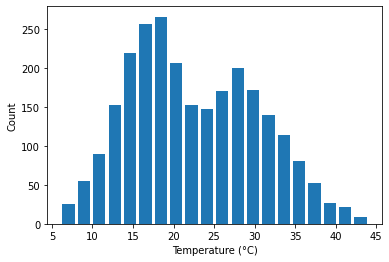

In [ ]:
plt.hist(df.Temperature,bins=20, rwidth=0.8)
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.Temperature.median()

21.35

In [ ]:
min_threshold_temp,max_threshold_temp=df.Temperature.quantile([0.001,0.99])
min_threshold_temp,max_threshold_temp


(6.36472, 40.48019999999997)

###REPLACING THE OUTLIER VALUES WITH MEDIAN

In [ ]:
df.loc[df["Temperature"] <6.338, "Temperature"] = 21.35
df.loc[df["Temperature"] >40.48019999999997, "Temperature"] = 21.35
df.Temperature


0       15.63
1       15.10
2       14.64
3       14.08
4       13.75
        ...  
2555    29.77
2556    28.77
2557    26.91
2558    23.90
2559    22.87
Name: Temperature, Length: 2560, dtype: float64

IDEAL CONDITIONS OF HUMIDITY FOR SAPOTA PLANT SHOULD RANGE BETWEEM 60%-80%.AS WE CAN SEE FROM THE PLOT MOST OF THE SAMPLES ARE IN THIS RANGE

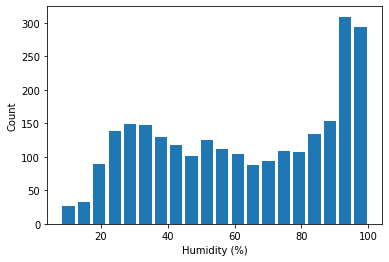

In [ ]:
plt.hist(df.Humidity,bins=20, rwidth=0.8)
plt.xlabel('Humidity (%)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.Humidity.median()

63.35

In [ ]:
min_threshold_humidity,max_threshold_humidity=df.Humidity.quantile([0.01,0.99])
min_threshold_humidity,max_threshold_humidity


(12.537700000000001, 100.0)

REPLACING THE OUTLIER VALUES WITH MEDIAN


In [ ]:
df.loc[df["Humidity"] <12.537700000000001, "Humidity"] =63.35
df.loc[df["Humidity"] >100.0, "Humidity"] = 63.35
df.Humidity

0       87.85
1       90.58
2       90.44
3       91.74
4       92.45
        ...  
2555    56.62
2556    62.36
2557    68.44
2558    82.60
2559    88.75
Name: Humidity, Length: 2560, dtype: float64

IDEAL CONDITIONS OF LEAF WETNESS FOR SAPOTA PLANT BE LESS THAN 2% .AS WE CAN SEE FROM THE PLOT MOST OF THE SAMPLES ARE IN THIS RANGE

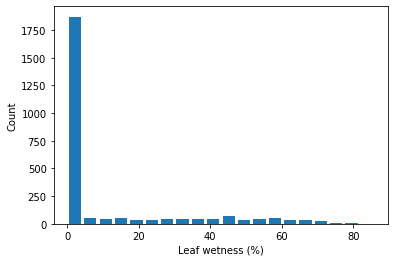

In [ ]:
plt.hist(df.Leafwetness,bins=20, rwidth=0.8)
plt.xlabel('Leaf wetness (%)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.Leafwetness.median()

0.0

In [ ]:
min_threshold_leafwetness,max_threshold_leafwetness=df.Leafwetness.quantile([0.01,0.99])
min_threshold_leafwetness,max_threshold_leafwetness


(0.0, 70.0)

In [ ]:
df.loc[df["Leafwetness"] <0, "Leafwetness"] = 0.0
df.loc[df["Leafwetness"] >70.0, "Leafwetness"] = 0.0
df.Leafwetness

0       35
1       43
2       58
3       62
4       67
        ..
2555     0
2556     0
2557     0
2558     0
2559    13
Name: Leafwetness, Length: 2560, dtype: int64

IDEAL CONDITIONS OF MOISTURE FOR SAPOTA PLANT SHOULD RANGE BETWEEM 100%-200%.AS WE CAN SEE FROM THE PLOT MOST OF THE SAMPLES ARE IN THIS RANGE

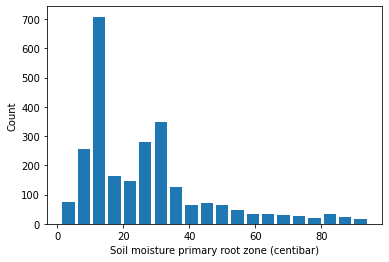

In [ ]:
plt.hist(df.Soilmoistureprimaryrootzone,bins=20, rwidth=0.8)
plt.xlabel('Soil moisture primary root zone (centibar)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.Soilmoistureprimaryrootzone.median()

22.52

In [ ]:
min_threshold_Soilmoistureprimaryrootzone,max_threshold_Soilmoistureprimaryrootzone=df.Soilmoistureprimaryrootzone.quantile([0.01,0.99])
min_threshold_Soilmoistureprimaryrootzone,max_threshold_Soilmoistureprimaryrootzone

(1.11, 87.04)

In [ ]:
df.loc[df["Soilmoistureprimaryrootzone"] <1.11, "Soilmoistureprimaryrootzone"] = 22.52
df.loc[df["Soilmoistureprimaryrootzone"] >87.04, "Soilmoistureprimaryrootzone"] = 22.52
df.Soilmoistureprimaryrootzone

0       16.82
1       16.53
2       16.58
3       16.52
4       16.47
        ...  
2555     3.50
2556     4.62
2557     5.68
2558     6.69
2559     7.65
Name: Soilmoistureprimaryrootzone, Length: 2560, dtype: float64

IDEAL CONDITIONS OF LUX FOR SAPOTA PLANT SHOULD RANGE BETWEEM 10
K-50K.

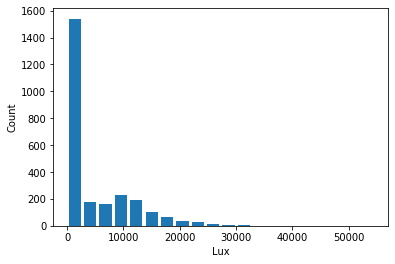

In [ ]:
plt.hist(df.Lux,bins=20, rwidth=0.8)
plt.xlabel('Lux')
plt.ylabel('Count')
plt.show()

In [ ]:
df.Lux.std()

6521.174169346251

In [ ]:
y=df[df['Lux']>0]
y.Lux.median()

8520.5

In [ ]:
#min_threshold_lux,max_threshold_lux=y.Lux.quantile([0.001,0.99])
#min_threshold_lux,max_threshold_lux

In [ ]:
df.loc[df["Lux"] <8000, "Lux"] =8520.5

df.Lux

0       8520.5
1       8520.5
2       8520.5
3       8520.5
4       8520.5
         ...  
2555    8520.5
2556    8520.5
2557    8520.5
2558    8520.5
2559    8520.5
Name: Lux, Length: 2560, dtype: float64

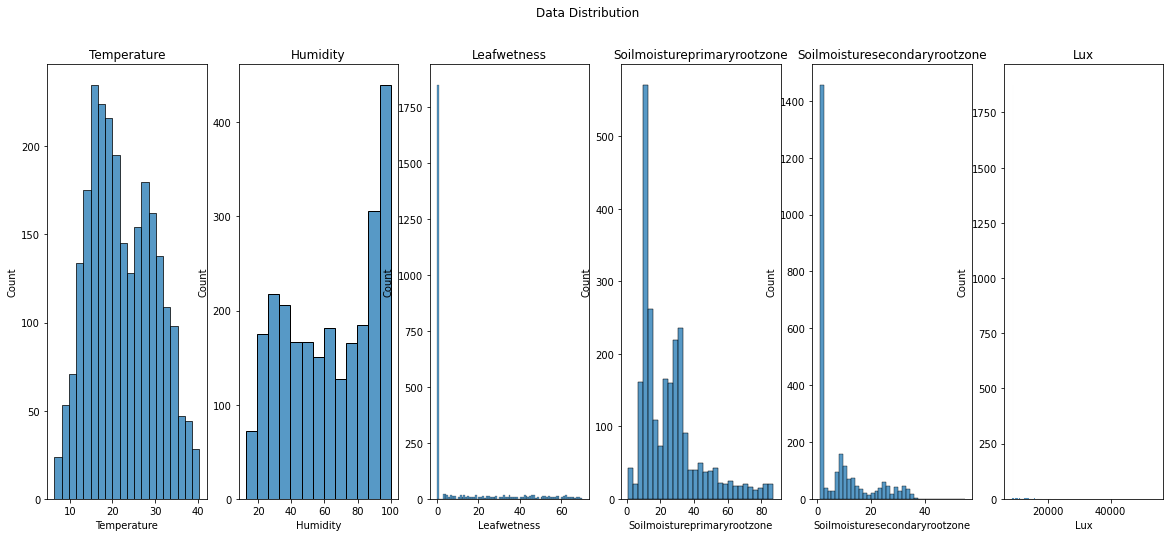

In [ ]:
plt.figure(figsize = (20,8))
plt.suptitle("Data Distribution")
for i in range(6):
  plt.subplot(1,6,i+1)
  sns.histplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.plot()

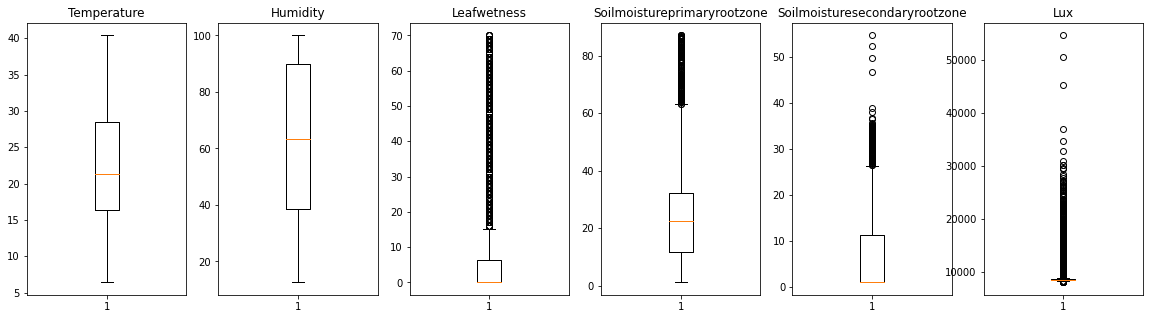

In [ ]:
col = ["Temperature" ,  "Humidity",  "Leafwetness",  "Soilmoistureprimaryrootzone",  "Soilmoisturesecondaryrootzone", "Lux" ]
plt.figure(figsize = (20,5))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

##DATA VISUALIZATION

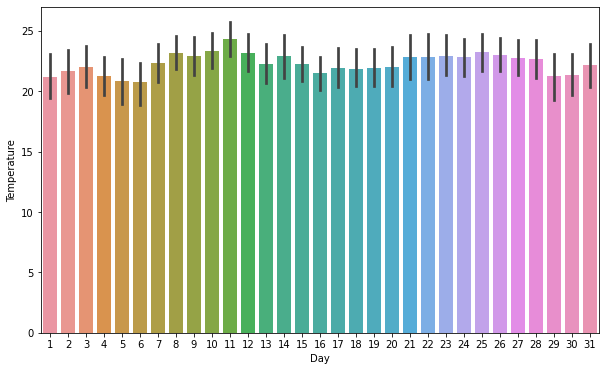

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Temperature'])

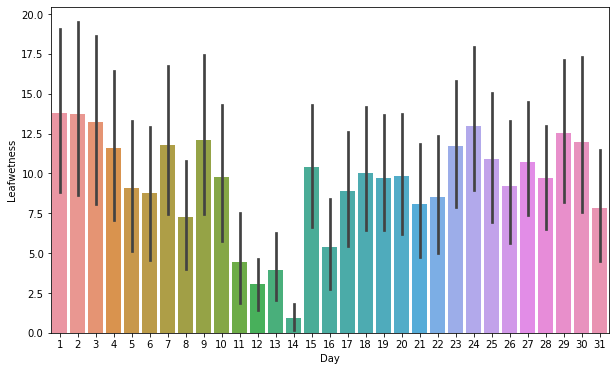

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Leafwetness'])

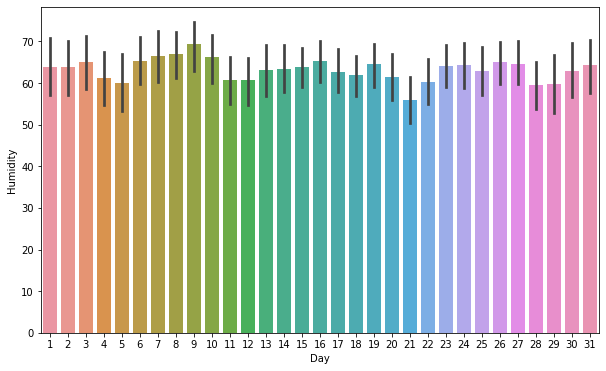

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Humidity'])

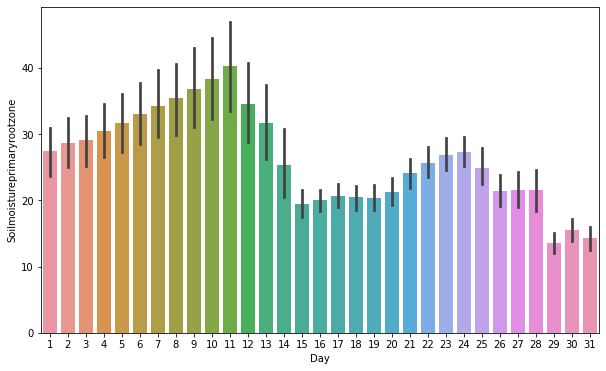

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Soilmoistureprimaryrootzone'])

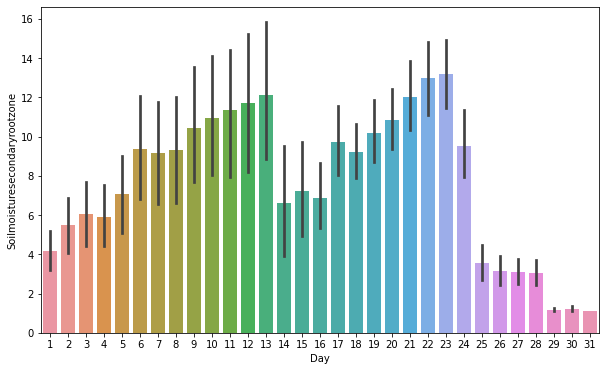

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Soilmoisturesecondaryrootzone'])

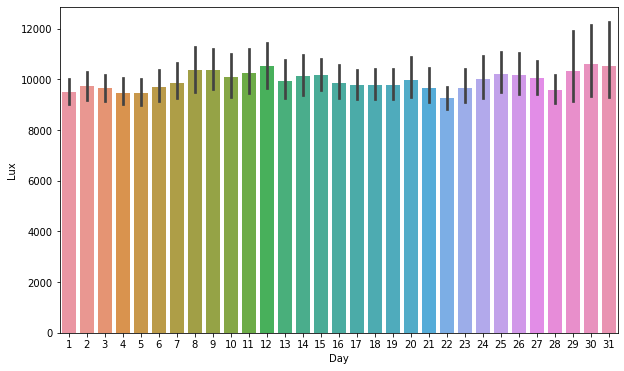

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Day'], y=df['Lux'])

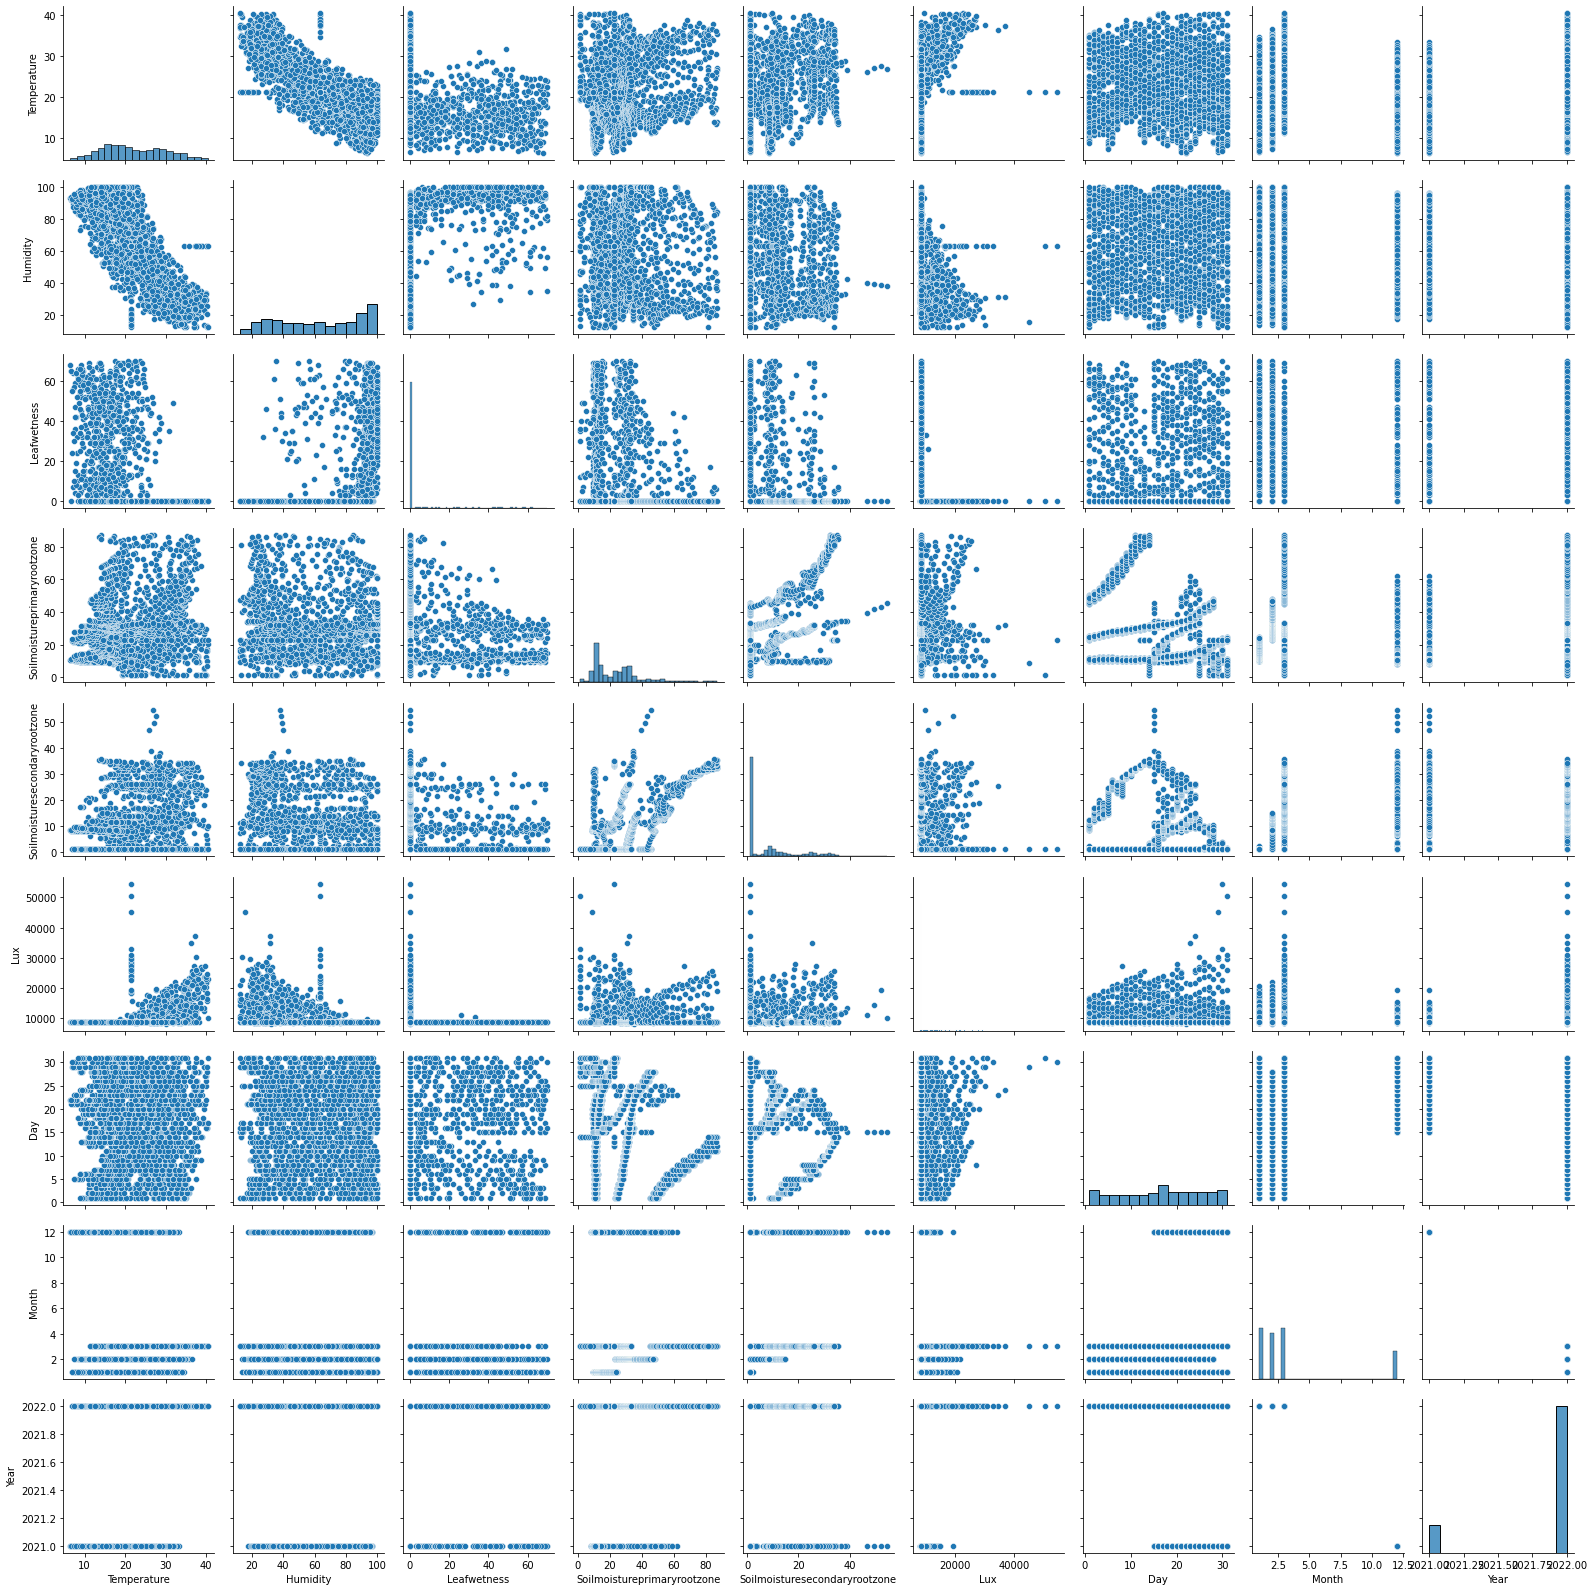

In [ ]:
sns.pairplot(df)
plt.show()

##MODELLING

In [ ]:
plant_health = []
m=45 # maximum temp
n=8 #  minimum temp
a=95 # maximum humidity
b=10 # minimum humidity
z=87 # maximum soil moisture 
x=10 # minimum soil moisture

j=30 # maximum leafwetness 
h=8000 # minimum LUX required
if df[(df['Temperature']<m) & (df['Temperature']>n) & (df['Humidity']<a) & (df['Humidity']>b) & (df['Soilmoistureprimaryrootzone']<z) & (df['Soilmoistureprimaryrootzone']>x) & (df['Leafwetness']<j)& (df['Lux']>h)]:
  plant_health.append(1)
else:
  plant_health.append(0)
df['Plant_Health']=plant_health
df.Plant_Health


ValueError: ignored

In [ ]:
import pandas as pd
plant_health = []
m=45 # maximum temp
n=8 #  minimum temp
a=95 # maximum humidity
b=10 # minimum humidity
z=87 # maximum soil moisture 
x=10 # minimum soil moisture

j=30 # maximum leafwetness 
h=8000 # minimum LUX required

x=df[(df['Temperature']<m) & (df['Temperature']>n) & (df['Humidity']<a) & (df['Humidity']>b) & (df['Soilmoistureprimaryrootzone']<z) & (df['Soilmoistureprimaryrootzone']>x) & (df['Leafwetness']<j)& (df['Lux']>h) ]
x['Plant_Health']=1
#x = x.drop("Date",axis = 1)
x = x.drop("Time",axis = 1)
x_df=pd.DataFrame(x)
x_df.shape
            

  
   
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1847, 11)

In [ ]:
m=45 # maximum temp
n=8 #  minimum temp
a=95 # maximum humidity
b=10 # minimum humidity
z=87 # maximum soil moisture 
x=10 # minimum soil moisture

j=30 # maximum leafwetness 
h=8000 # minimum LUX required
y=df[((df['Temperature']>m) | (df['Temperature']<n)) & ((df['Humidity']>a) | (df['Humidity']<b) )| (df['Soilmoistureprimaryrootzone']>z) | (df['Soilmoistureprimaryrootzone']<x) |  (df['Leafwetness']>j)| (df['Lux']<h)]
y['Plant_Health']=0
y = y.drop("Date",axis = 1)
y = y.drop("Time",axis = 1)
y_df=pd.DataFrame(y)
y_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


(586, 10)

In [ ]:
data= pd.concat([x_df,y_df],axis = 0 )
data.shape

(2433, 11)

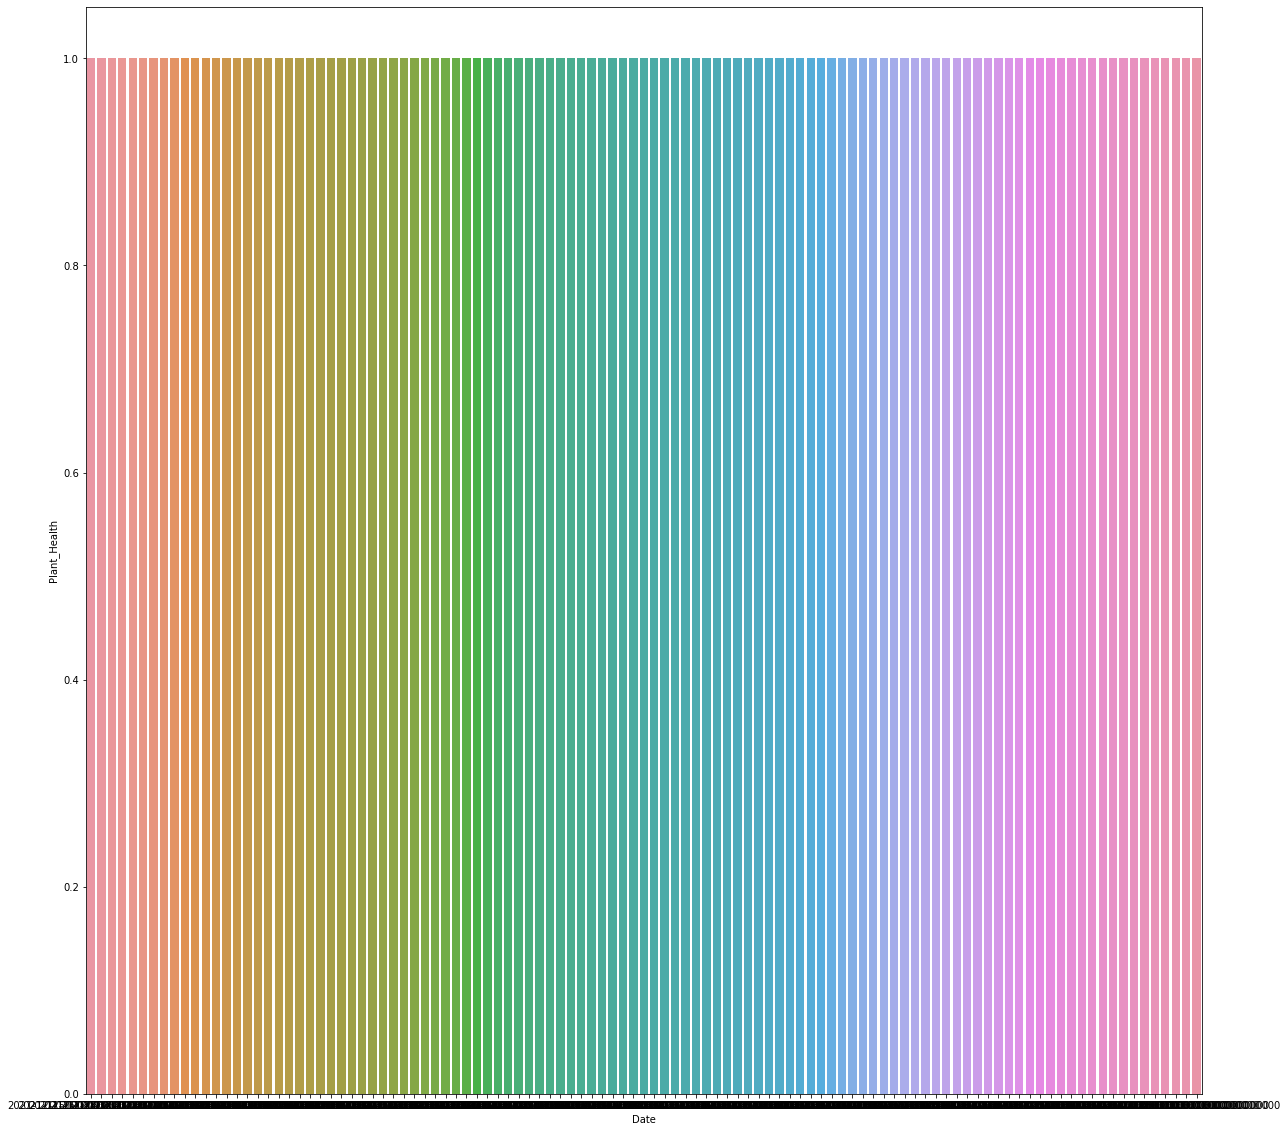

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x=data['Date'], y=data['Plant_Health'])

In [ ]:
plt.scatter(Leafwetness, Plant_Health)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

plt.xlabel('Leafwetness')
plt.ylabel('Plant_Health')
plt.show()

NameError: ignored

INPUT-consists of Temperature	Humidity	Leafwetness	Soilmoistureprimaryrootze Lux OUTPUT-consists of Plant_Health

In [ ]:
Input = data.drop("Plant_Health",axis = 1)
Input = Input.drop("Soilmoisturesecondaryrootzone",axis = 1)
Input = Input.drop("Day",axis = 1)
Input = Input.drop("Month",axis = 1)
Input = Input.drop("Year",axis = 1)
Input = Input.drop("Date",axis = 1)


Output = data["Plant_Health"]
Input.head()

,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Lux
7,14.27,92.87,0,11.86,8520.5
10,25.50,52.19,0,27.97,11136.0
11,26.48,42.93,0,34.54,13273.0
12,27.58,38.88,0,42.95,19285.0
13,26.90,38.06,0,45.41,10013.0


[]

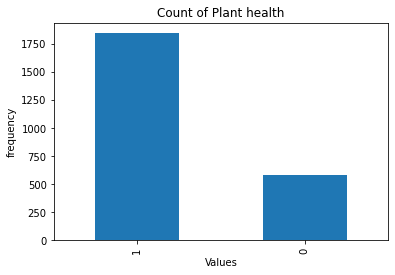

In [ ]:
Output.value_counts().plot(kind = "bar")
plt.xlabel("Values")
plt.ylabel("frequency")
plt.title("Count of Plant health")
plt.plot()

In [ ]:

from sklearn.preprocessing import MinMaxScaler
inp_col = Input.columns
minmax = MinMaxScaler()
Input = minmax.fit_transform(Input)
Input = pd.DataFrame(Input,columns = inp_col)
Input.head()


,Temperature,Humidity,Leafwetness,Soilmoistureprimaryrootzone,Lux
0,0.231539,0.918468,0.0,0.125102,0.010954
1,0.561930,0.453288,0.0,0.312580,0.067079
2,0.590762,0.347399,0.0,0.389038,0.112935
3,0.623124,0.301086,0.0,0.486908,0.241942
4,0.603119,0.291710,0.0,0.515536,0.042981


###Splitting the data into test and train

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Output,test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1703, 5), (730, 5), (1703,), (730,))

###Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model = LogisticRegression()
model.fit(X_train,Y_train)
model_prediction = model.predict(X_test)

### Accuracy Score

In [ ]:
accuracy_score(Y_test,model_prediction)

0.9123287671232877

In [ ]:
print(classification_report(Y_test,model_prediction))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       164
           1       0.92      0.97      0.95       566

    accuracy                           0.91       730
   macro avg       0.90      0.84      0.86       730
weighted avg       0.91      0.91      0.91       730



In [ ]:
conf_matrix = confusion_matrix(Y_test,model_prediction)
conf_matrix

array([[115,  49],
       [ 15, 551]])

In [ ]:
#sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
#plt.ylabel("True Label")
#plt.xlabel("Predicted Label")
#plt.title("Confusion Matrix")
#plt.plot()

###Random Forest Model Fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[164   0]
 [  2 564]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       164
           1       1.00      1.00      1.00       566

    accuracy                           1.00       730
   macro avg       0.99      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730

Accuracy: 0.9972602739726028
